In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('模型数据.xlsx')
data.head(2)

,crash,time of week,weather,volume,temperature,daytime,season
0,1,1,cloudy,0,0,afternoon,winter
1,1,1,cloudy,0,0,afternoon,winter


In [3]:
from pgmpy.models import BayesianNetwork
model = BayesianNetwork([('time of week', 'temperature'),('time of week','volume'),
                         ('daytime','temperature'),('daytime','volume'),
                         ('season','temperature'),('season','volume'),('season','weather'),
                         ('weather','temperature'),('weather','volume'),('weather','crash'),
                         ('temperature','crash'),
                         ('volume','crash')])

In [4]:
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
estimator = MaximumLikelihoodEstimator(model, data)

In [5]:
cpd = estimator.estimate_cpd('volume')
print(cpd.variables)
print(cpd.cardinality)
pd.DataFrame(cpd.get_values())

['volume', 'daytime', 'season', 'time of week', 'weather']
[3 6 4 3 5]


,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.486328,0.520000,0.566524,0.333333,0.61250,0.467337,0.491071,0.3125,0.333333,0.333333,...,0.3625,0.666667,0.5000,0.333333,0.734375,0.317829,0.250,0.333333,0.333333,0.409091
1,0.277344,0.289231,0.317597,0.333333,0.35625,0.291457,0.312500,0.4375,0.333333,0.333333,...,0.3875,0.166667,0.4375,0.333333,0.187500,0.449612,0.475,0.333333,0.333333,0.409091
2,0.236328,0.190769,0.115880,0.333333,0.03125,0.241206,0.196429,0.2500,0.333333,0.333333,...,0.2500,0.166667,0.0625,0.333333,0.078125,0.232558,0.275,0.333333,0.333333,0.181818


In [6]:
cpd_matric = pd.DataFrame(cpd.get_values())
column_num = cpd_matric.shape[1]
CPD = pd.DataFrame()

# 中流量

In [7]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
list4 = np.array([])
list5 = np.array([])

large_unit = 0
unit = int(column_num/cpd.cardinality[1])
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)
    list4 = np.append(list4,np.linspace(int(i*large_unit + 4*unit),int(i*large_unit+ 5*unit)-1,int(unit))).astype(int)
    list5 = np.append(list5,np.linspace(int(i*large_unit + 5*unit),int(i*large_unit+ 6*unit)-1,int(unit))).astype(int)

t0 = np.array([])
for i in list0:
    t0 = np.append(t0,cpd_matric[i][1])

t1 = np.array([])
for i in list1:
    t1 = np.append(t1,cpd_matric[i][1])

t2 = np.array([])
for i in list2:
    t2 = np.append(t2,cpd_matric[i][1])

t3 = np.array([])
for i in list3:
    t3 = np.append(t3,cpd_matric[i][1])

t4 = np.array([])
for i in list4:
    t4 = np.append(t4,cpd_matric[i][1])

t5 = np.array([])
for i in list5:
    t5 = np.append(t5,cpd_matric[i][1])

CPD['volume_1_daytime_0'] = pd.DataFrame(t0)
CPD['volume_1_daytime_1'] = pd.DataFrame(t1)
CPD['volume_1_daytime_2'] = pd.DataFrame(t2)
CPD['volume_1_daytime_3'] = pd.DataFrame(t3)
CPD['volume_1_daytime_4'] = pd.DataFrame(t4)
CPD['volume_1_daytime_5'] = pd.DataFrame(t5)

In [8]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])
t3 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][1])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][1])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][1])

for i in list3:
    t3 = np.append(t3,cpd_matric[i][1])

CPD['volume_1_season_0'] = pd.DataFrame(t0)
CPD['volume_1_season_1'] = pd.DataFrame(t1)
CPD['volume_1_season_2'] = pd.DataFrame(t2)
CPD['volume_1_season_3'] = pd.DataFrame(t3)

In [9]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][1])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][1])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][1])

CPD['volume_1_timeofweek_0'] = pd.DataFrame(t0)
CPD['volume_1_timeofweek_1'] = pd.DataFrame(t1)
CPD['volume_1_timeofweek_2'] = pd.DataFrame(t2)

In [10]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
list4 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])
t3 = np.array([])
t4 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]*cpd.cardinality[4]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)
    list4 = np.append(list3,np.linspace(int(i*large_unit + 4*unit),int(i*large_unit+ 5*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][1])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][1])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][1])

for i in list3:
    t3 = np.append(t3,cpd_matric[i][1])

for i in list4:
    t4 = np.append(t4,cpd_matric[i][1])

CPD['volume_1_weather_0'] = pd.DataFrame(t0)
CPD['volume_1_weather_1'] = pd.DataFrame(t1)
CPD['volume_1_weather_2'] = pd.DataFrame(t2)
CPD['volume_1_weather_3'] = pd.DataFrame(t3)
CPD['volume_1_weather_4'] = pd.DataFrame(t4)

In [11]:
cpd = CPD.copy()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [13]:
#
data = pd.DataFrame()

tem = pd.DataFrame()
tem['CPD0'] = cpd[['volume_1_daytime_0']]
tem['Daytime'] = 'Afternoon'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['volume_1_daytime_1']]
tem['Daytime'] = 'Dawn'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['volume_1_daytime_2']]
tem['Daytime'] = 'Evening'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['volume_1_daytime_3']]
tem['Daytime'] = 'Morning'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['volume_1_daytime_4']]
tem['Daytime'] = 'Noon'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['volume_1_season_0']]
tem['Season'] = 'Autumn'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['volume_1_season_1']]
tem['Season'] = 'Spring'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['volume_1_season_2']]
tem['Season'] = 'Summer'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['volume_1_season_3']]
tem['Season'] = 'Winter'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['volume_1_timeofweek_0']]
tem['Timeofweek'] = 'Weekday'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['volume_1_timeofweek_1']]
tem['Timeofweek'] = 'Weekend'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['volume_1_timeofweek_2']]
tem['Timeofweek'] = 'Holiday'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['volume_1_weather_0']]
tem['Weather'] = 'Cloudy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['volume_1_weather_1']]
tem['Weather'] = 'Foggy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['volume_1_weather_2']]
tem['Weather'] = 'Rainy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['volume_1_weather_3']]
tem['Weather'] = 'Snowy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['volume_1_weather_4']]
tem['Weather'] = 'Sunny'
data = pd.concat([data,tem],axis=0)

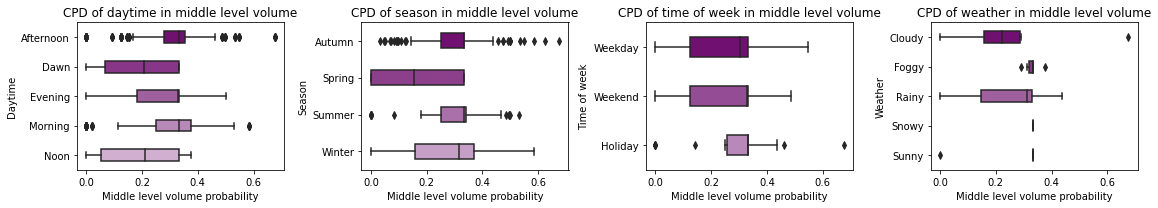

In [14]:
width = 0.4

plt.figure(figsize=(16,3))
purple_cmap = colors.LinearSegmentedColormap.from_list("Purple", ["purple", "white"])

plt.subplot(1, 4, 1)
labels = data['Daytime'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD0', y='Daytime', data=data, width=width, palette=custom_palette)
#plt.ylabel('Temperature',fontsize=i,fontproperties='Times New Roman')
plt.ylabel('Daytime')
plt.xlabel('Middle level volume probability')
plt.title('CPD of daytime in middle level volume')
plt.tight_layout()

plt.subplot(1, 4, 2)
labels = data['Season'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD1', y='Season', data=data, width=width, palette=custom_palette)
plt.ylabel('Season')
plt.xlabel('Middle level volume probability')
plt.title('CPD of season in middle level volume')
plt.tight_layout()

plt.subplot(1, 4, 3)
labels = data['Timeofweek'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD2', y='Timeofweek', data=data, width=width, palette=custom_palette)
plt.ylabel('Time of week')
plt.xlabel('Middle level volume probability')
plt.title('CPD of time of week in middle level volume')
plt.tight_layout()

plt.subplot(1, 4, 4)
labels = data['Weather'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD3', y='Weather', data=data, width=width, palette=custom_palette)
plt.ylabel('Weather')
plt.xlabel('Middle level volume probability')
plt.title('CPD of weather in middle level volume')
plt.tight_layout()
#plt.text(1.95,0.4,'Crash',fontsize=10,weight='bold')
plt.savefig('Fig/Middle volume.jpg',dpi=500)
plt.show()